In [14]:
import pandas as pd

# Power curves of two reference wind turbines
Data5MW = pd.read_csv("../inputs/NREL_Reference_5MW_126.csv")
Data15MW = pd.read_csv("../inputs/NREL_Reference_15MW_240.csv")
print("Data5MW",Data5MW)
print("Data15MW",Data15MW)


Data5MW     Wind Speed [m/s]  Power [kW]    Cp [-]  Thrust [kN]    Ct [-]
0                3.0       40.52  0.208547        77.66  1.132035
1                4.0      177.67  0.385795       121.90  0.999471
2                5.0      403.90  0.449038       174.88  0.917697
3                6.0      737.59  0.474547       236.23  0.860850
4                7.0     1187.18  0.480994       304.55  0.815371
5                7.1     1239.25  0.481173       311.87  0.811615
6                7.2     1292.52  0.481236       319.27  0.807939
7                7.3     1347.32  0.481306       326.77  0.804434
8                7.4     1403.26  0.481239       334.35  0.800994
9                7.5     1460.70  0.481167       342.03  0.797681
10               7.6     1519.64  0.481082       349.82  0.794529
11               7.7     1580.17  0.481007       357.72  0.791496
12               7.8     1642.11  0.480880       365.71  0.788560
13               7.9     1705.76  0.480789       374.51  0.787217
14

In [15]:
import xarray as xr

ds = xr.open_dataset("../inputs/1997-1999.nc", engine="netcdf4")
print(ds)

<xarray.Dataset> Size: 2MB
Dimensions:     (valid_time: 26280, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 210kB 1997-01-01 ... 1999-12-31T2...
  * latitude    (latitude) float64 16B 8.0 7.75
  * longitude   (longitude) float64 16B 55.5 55.75
    expver      (valid_time) <U4 420kB ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 420kB ...
    v10         (valid_time, latitude, longitude) float32 420kB ...
    u100        (valid_time, latitude, longitude) float32 420kB ...
    v100        (valid_time, latitude, longitude) float32 420kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-22T03:22 GRIB to CDM+CF via cfgrib-0.9.1...


In [16]:
import xarray as xr
import os

# Path to your folder with all .nc files
data_dir = "../inputs"

# Open all .nc files together
ds_all = xr.open_mfdataset(
    os.path.join(data_dir, "*.nc"),
    engine="netcdf4",
    combine="by_coords"
)

# Show summary
print(ds_all)

<xarray.Dataset> Size: 21MB
Dimensions:     (valid_time: 236664, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 2MB 1997-01-01 ... 2023-12-31T23:...
  * latitude    (latitude) float64 16B 8.0 7.75
  * longitude   (longitude) float64 16B 55.5 55.75
    expver      (valid_time) <U4 4MB dask.array<chunksize=(26280,), meta=np.ndarray>
Data variables:
    u10         (valid_time, latitude, longitude) float32 4MB dask.array<chunksize=(26280, 2, 2), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 4MB dask.array<chunksize=(26280, 2, 2), meta=np.ndarray>
    u100        (valid_time, latitude, longitude) float32 4MB dask.array<chunksize=(26280, 2, 2), meta=np.ndarray>
    v100        (valid_time, latitude, longitude) float32 4MB dask.array<chunksize=(26280, 2, 2), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
 

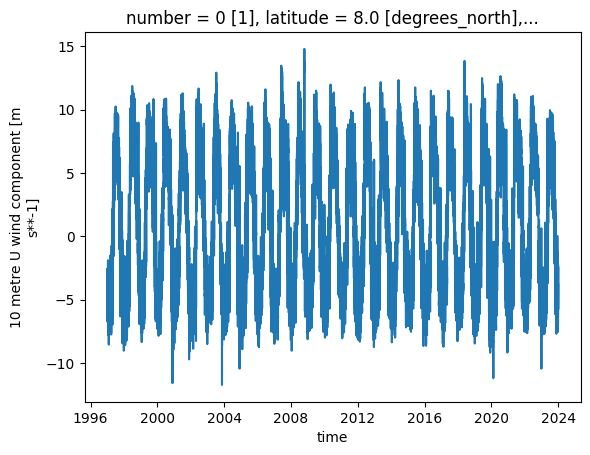

In [17]:
ds_all["u10"].isel(latitude=0, longitude=0).plot()


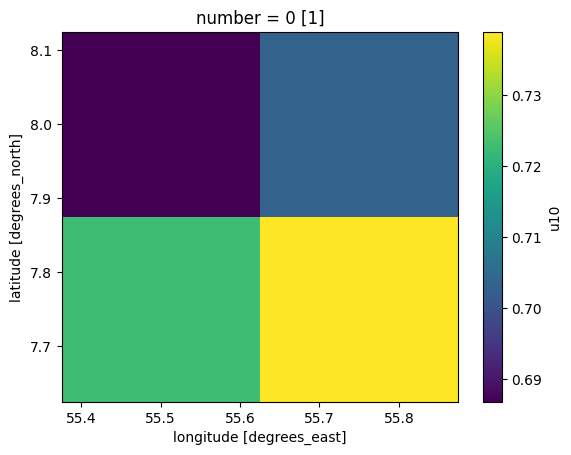

In [18]:
ds_all["u10"].mean(dim="valid_time").plot()


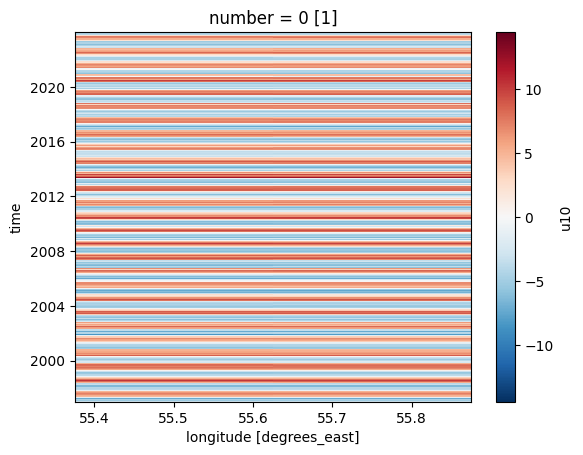

In [19]:
ds_all["u10"].mean(dim="latitude").plot()